In [1]:
from tf.app import use
color = {1: "#47edff", 2: "#81ee93", 3: "#eaff47", 4: "#ffcb47", 5: "#ffa647", 6: "#ff7b47", 7: "#ff479d", 8: "#ff4747", 9: "#477eff", 10: "#a647ff"}

In [2]:
N1904 = use("CenterBLC/N1904", version="1.0.0", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

Examples based on:\
https://github.com/oliverglanz/Text-Fabric/blob/master/Colloquium-BibleSoftware/GSEM505_Colloquium_ExegeticalUseOfBibleSoftware.ipynb

# Occurrences of the expressions "Jesus Christ" and "Christ Jesus" in the NT

## Occurrences of "Jesus"

In [285]:
results = N1904.search("""
word lemmatranslit=Iesous
""")
N1904.table(results)

  0.13s 913 results


In [286]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='jesus.tsv')

In [4]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/jesus.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemmatranslit1
0,1,Matthew,1,1,3,word,Ἰησοῦ,Iesous
1,2,Matthew,1,16,243,word,Ἰησοῦς,Iesous


In [5]:
canonicalorder = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 
                 'Romans', 'I_Corinthians', 'II_Corinthians', 
                 'Galatians', 'Ephesians', 'Philippians', 'Colossians', 
                 'I_Thessalonians', 'II_Thessalonians', 'I_Timothy', 
                 'II_Timothy', 'Titus', 'Philemon', 'Hebrews', 
                 'James', 'I_Peter', 'II_Peter', 'I_John', 
                 'II_John', 'III_John', 'Jude', 'Revelation']

df = pd.DataFrame(NTresults['S1']) # Creating Pandas DataFrame

# Contando as ocorrências
book_counts_jesus = df['S1'].value_counts().reindex(canonicalorder, fill_value=0)

#book_counts_jesus = df["S1"].value_counts().reset_index() # Counting occurrences per book
#book_counts_jesus.columns = ['Book', 'Jesus']
#book_counts_jesus = book_counts_jesus.reindex(canonicalorder, fill_value=0)

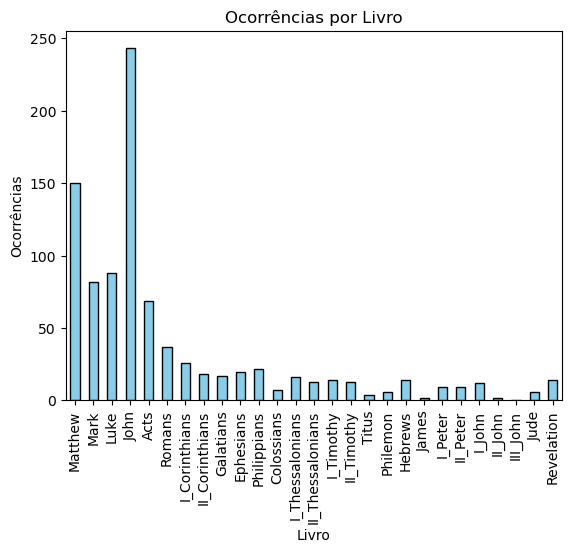

In [6]:
book_counts_jesus.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Livro')
plt.ylabel('Ocorrências')
plt.title('Ocorrências por Livro')
plt.xticks(rotation=90)
plt.show()

## Occurrences of "Jesus Christ"

In [396]:
results = N1904.search("""
w1:word lemmatranslit=Iesous
w2:word lemmatranslit=Khristos

w1 <: w2
""")
N1904.table(results)

  0.32s 132 results


In [397]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='jesuschrist.tsv')

In [7]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/jesuschrist.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemmatranslit1,NODE2,TYPE2,TEXT2,lemmatranslit2
0,1,Matthew,1,1,3,word,Ἰησοῦ,Iesous,4,word,Χριστοῦ,Khristos
1,2,Matthew,1,18,278,word,Ἰησοῦ,Iesous,279,word,Χριστοῦ,Khristos


In [8]:
df = pd.DataFrame(NTresults['S1']) # Creating Pandas DataFrame

book_counts_jc = df["S1"].value_counts().reset_index() # Counting occurrences per book
book_counts_jc.columns = ['Book', 'Christ Jesus']

In [9]:
canonicalorder = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 
                 'Romans', 'I_Corinthians', 'II_Corinthians', 
                 'Galatians', 'Ephesians', 'Philippians', 'Colossians', 
                 'I_Thessalonians', 'II_Thessalonians', 'I_Timothy', 
                 'II_Timothy', 'Titus', 'Philemon', 'Hebrews', 
                 'James', 'I_Peter', 'II_Peter', 'I_John', 
                 'II_John', 'III_John', 'Jude', 'Revelation']

# Contando as ocorrências
book_counts_jc = df['S1'].value_counts().reindex(canonicalorder , fill_value=0)

#book_counts_jc = book_counts_jc[book_counts_jc > 0]

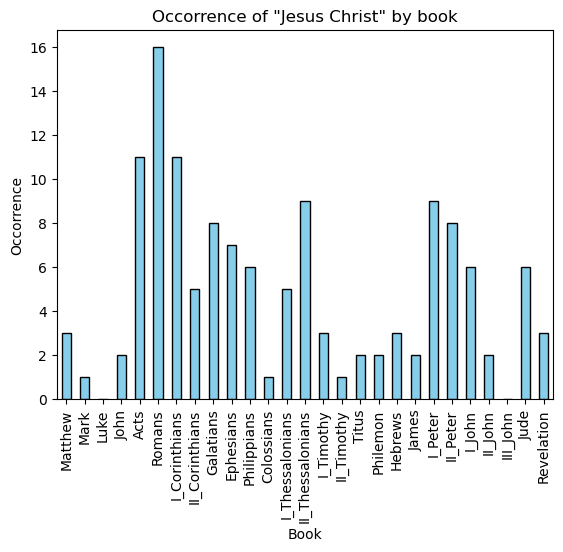

In [91]:
book_counts_jc.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Book')
plt.ylabel('Occorrence')
plt.title('Occorrence of "Jesus Christ" by book')
plt.xticks(rotation=90)
plt.show()

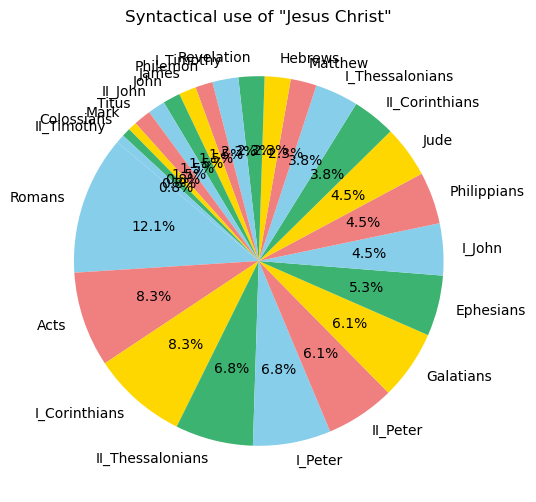

In [402]:
df = pd.DataFrame(NTresults['S1']) # Creating Pandas DataFrame

book_counts_jc = df["S1"].sort_values().value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts_jc, labels=book_counts_jc.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold", "mediumseagreen"])
plt.title("Syntactical use of \"Jesus Christ\"")
plt.show() # Plot pie chart

## Occurrences of "Christ Jesus"

In [403]:
results = N1904.search("""
w1:word lemmatranslit=Iesous
w2:word lemmatranslit=Khristos

w1 :> w2
""")
N1904.table(results)

  0.27s 98 results


In [404]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='christjesus.tsv')

In [11]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/christjesus.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemmatranslit1,NODE2,TYPE2,TEXT2,lemmatranslit2
0,1,Acts,3,20,66378,word,"Ἰησοῦν,",Iesous,66377,word,Χριστὸν,Khristos
1,2,Acts,5,42,67963,word,Ἰησοῦν.,Iesous,67962,word,Χριστὸν,Khristos


In [12]:
df = pd.DataFrame(NTresults['S1']) # Creating Pandas DataFrame

book_counts_cj = df["S1"].value_counts() # Counting occurrences per book

In [13]:
canonicalorder = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 
                 'Romans', 'I_Corinthians', 'II_Corinthians', 
                 'Galatians', 'Ephesians', 'Philippians', 'Colossians', 
                 'I_Thessalonians', 'II_Thessalonians', 'I_Timothy', 
                 'II_Timothy', 'Titus', 'Philemon', 'Hebrews', 
                 'James', 'I_Peter', 'II_Peter', 'I_John', 
                 'II_John', 'III_John', 'Jude', 'Revelation']

# Contando as ocorrências
book_counts_cj = df['S1'].value_counts().reindex(canonicalorder , fill_value=0)

#book_counts_jc = book_counts_jc[book_counts_jc > 0]

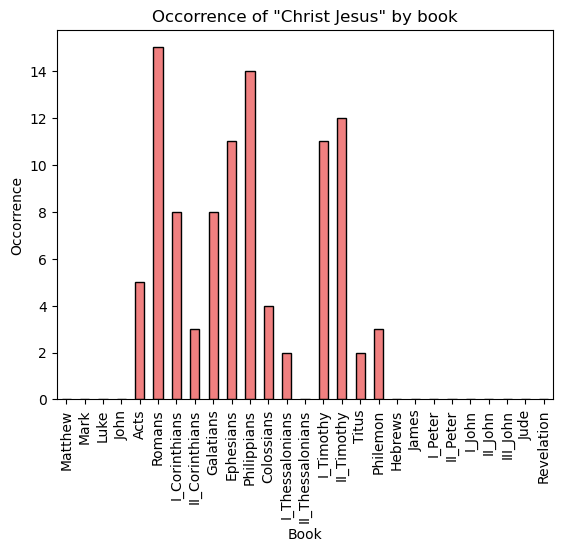

In [90]:
book_counts_cj.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Book')
plt.ylabel('Occorrence')
plt.title('Occorrence of "Christ Jesus" by book')
plt.xticks(rotation=90)
plt.show()

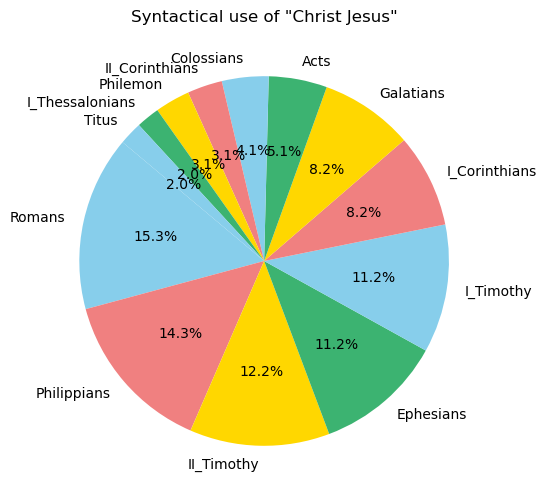

In [409]:
df = pd.DataFrame(NTresults['S1']) # Creating Pandas DataFrame

book_counts_cj = df["S1"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts_cj, labels=book_counts_cj.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold", "mediumseagreen"])
plt.title("Syntactical use of \"Christ Jesus\"")
plt.show() # Plot pie chart

In [61]:
df_merged = pd.merge(book_counts_jc, book_counts_cj, on='S1', how='outer')
df_merged = df_merged.rename(columns={'count_x': 'JesusChrist', 'count_y': 'ChristJesus'})

df_merged = pd.merge(df_merged, book_counts_jesus, on='S1', how='outer')
df_merged = df_merged.rename(columns={'count': 'Jesus'})

df_merged['jcratio'] = (df_merged['JesusChrist']/(df_merged['JesusChrist']+df_merged['ChristJesus'])).round(3)
df_merged['cjratio'] = (df_merged['ChristJesus']/(df_merged['JesusChrist']+df_merged['ChristJesus'])).round(3)

df_merged['jcratio_total'] = (df_merged['JesusChrist']/df_merged['Jesus']).round(3)
df_merged['cjratio_total'] = (df_merged['ChristJesus']/df_merged['Jesus']).round(3)

df_merged['complement_total'] = (1-df_merged['jcratio_total']-df_merged['cjratio_total']).round(3)

df_merged=df_merged.fillna(0)

In [62]:
df_merged

,JesusChrist,ChristJesus,Jesus,jcratio,cjratio,jcratio_total,cjratio_total,complement_total
S1,,,,,,,,
Matthew,3,0,150,1.000,0.000,0.020,0.000,0.980
Mark,1,0,82,1.000,0.000,0.012,0.000,0.988
Luke,0,0,88,0.000,0.000,0.000,0.000,1.000
John,2,0,243,1.000,0.000,0.008,0.000,0.992
Acts,11,5,69,0.688,0.312,0.159,0.072,0.769
Romans,16,15,37,0.516,0.484,0.432,0.405,0.163
I_Corinthians,11,8,26,0.579,0.421,0.423,0.308,0.269
II_Corinthians,5,3,18,0.625,0.375,0.278,0.167,0.555
Galatians,8,8,17,0.500,0.500,0.471,0.471,0.058


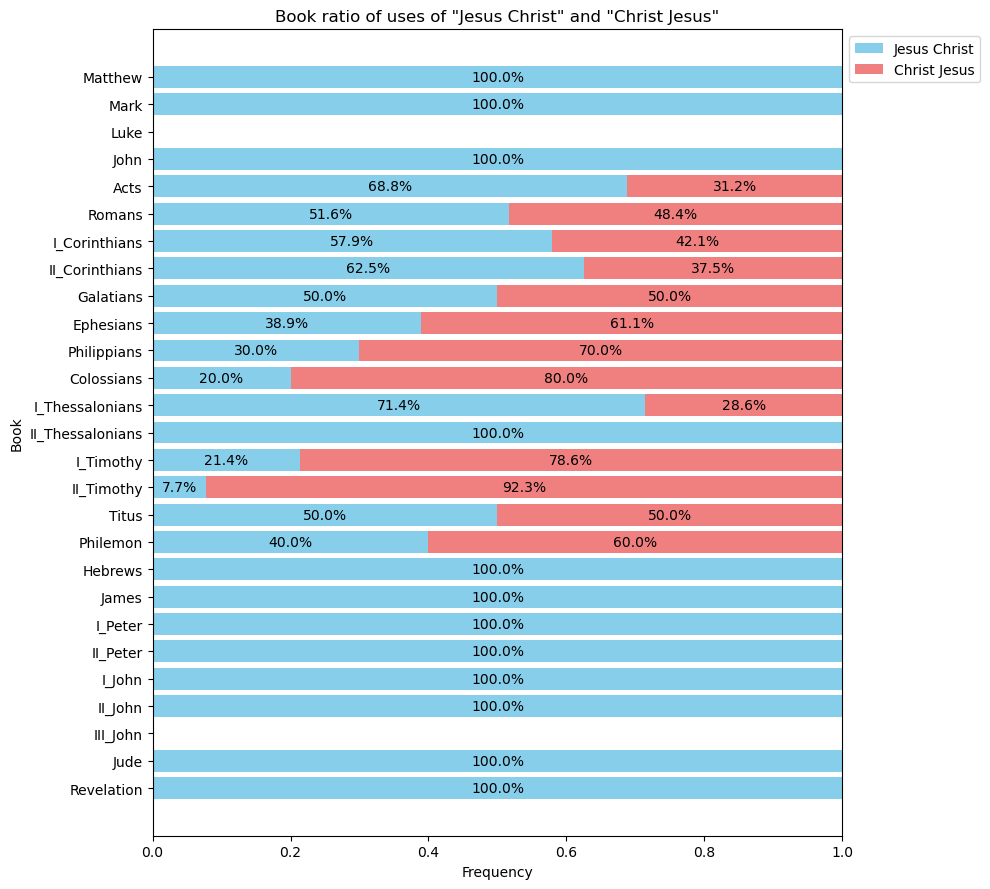

In [84]:
# Plot the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 9))

# Plot each category as a stacked bar
ax.barh(df_merged.index, df_merged['jcratio'], color='skyblue', label='Jesus Christ')
ax.barh(df_merged.index, df_merged['cjratio'], left=df_merged['jcratio'], color='lightcoral', label='Christ Jesus')

# Add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Book')
ax.set_title('Book ratio of uses of \"Jesus Christ\" and \"Christ Jesus\"')
ax.legend(loc='upper right')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Add data labels to the bars
for i, (jc, cj) in enumerate(zip(df_merged['jcratio'], df_merged['cjratio'])):
    if jc > 0:
        ax.text(jc/2, i, str(round(jc*100,2))+"%", va='center', ha='center', color='black')
    if cj > 0:
        ax.text(jc + cj/2, i, str(round(cj*100,2))+"%", va='center', ha='center', color='black')

plt.tight_layout()
plt.show()

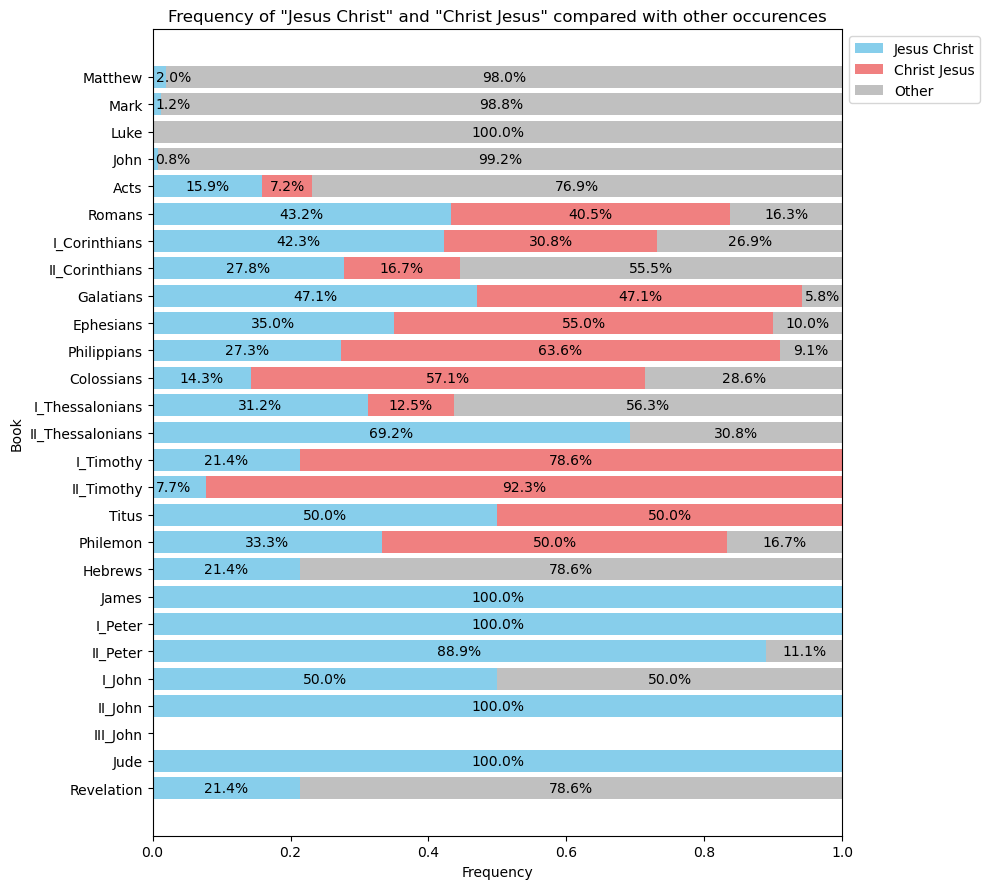

In [86]:
# Plot the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 9))

# Plot each category as a stacked bar
ax.barh(df_merged.index, df_merged['jcratio_total'], color='skyblue', label='Jesus Christ')
ax.barh(df_merged.index, df_merged['cjratio_total'], left=df_merged['jcratio_total'], color='lightcoral', label='Christ Jesus')
ax.barh(df_merged.index, df_merged['complement_total'], left=(df_merged['jcratio_total']+df_merged['cjratio_total']), color='silver', label='Other')

# Add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Book')
ax.set_title('Frequency of \"Jesus Christ" and \"Christ Jesus\" compared with other occurences')
ax.legend(loc='upper right')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Add data labels to the bars
for i, (jc, cj, com) in enumerate(zip(df_merged['jcratio_total'], df_merged['cjratio_total'], df_merged['complement_total'])):
    if jc > 0:
        if jc < 0.1:
            ax.text(0.03, i, str(round(jc*100,2))+"%", va='center', ha='center', color='black')
        else:
            ax.text(jc/2, i, str(round(jc*100,2))+"%", va='center', ha='center', color='black')
    if cj > 0:
        ax.text(jc + cj/2, i, str(round(cj*100,2))+"%", va='center', ha='center', color='black')
    if com > 0:
        ax.text(jc + cj + com/2, i, str(round(com*100,2))+"%", va='center', ha='center', color='black')

plt.tight_layout()
plt.show()

# Word study of σπλαγχνίζομαι

In [3]:
results = N1904.search("""
w1:word lemma=σπλαγχνίζομαι ln*
w2:word lemma*

w2 <frame=A0|A1- w1

""")
N1904.table(results)

  0.31s 12 results


In [103]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='wordstudy.tsv')

In [50]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [106]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/wordstudy.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemma1,NODE2,TYPE2,TEXT2,lemma2
0,1,Matthew,9,36,4826,word,ἐσπλαγχνίσθη,σπλαγχνίζομαι,4797,word,Ἰησοῦς,Ἰησοῦς
1,2,Matthew,14,14,8257,word,ἐσπλαγχνίσθη,σπλαγχνίζομαι,8231,word,Ἰησοῦς,Ἰησοῦς


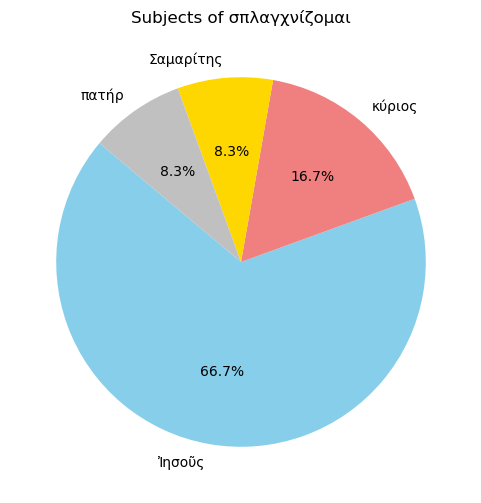

In [107]:
df = pd.DataFrame(NTresults['lemma2']) # Creating Pandas DataFrame

voice_verb = df["lemma2"].value_counts() # Counting subject lemmas

plt.figure(figsize=(6, 6))
plt.pie(voice_verb, labels=voice_verb.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold", "silver"])
plt.title("Subjects of σπλαγχνίζομαι")
plt.show() # Plot pie chart

# Analyzing Louw-Nida top-level classification of predicates of clauses in which Jesus is the subject

In [21]:
results = N1904.search("""
c1:clause
    p1:phrase function=Subj
        w1:word lemma=Ἰησοῦς
    p2:phrase function=Pred
        w2:word lemma* ln*
    
c1 <parent- p1
c1 <parent- p2
""")
N1904.table(results, end=1, colorMap={4:'pink'})

  0.76s 368 results


n,p,verse,phrase,phrase,word,word,clause
1,Matthew 1:16,,ἐγεννήθη,Ἰησοῦς ὁ λεγόμενος Χριστός.,ἐγεννήθη,Ἰησοῦς,ἐξ ἧς ἐγεννήθη Ἰησοῦς ὁ λεγόμενος Χριστός.


In [3]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from matplotlib.ticker import ScalarFormatter

In [4]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/subject.tsv', delimiter='\t', encoding='utf-16')
NTresults.tail(10)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,...,lemma3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lemma5,ln5
358,359,Hebrews,6,20,174945,clause,"ὅπου πρόδρομος ὑπὲρ ἡμῶν εἰσῆλθεν Ἰησοῦς, κατὰ...",249290,phrase,"πρόδρομος Ἰησοῦς,",...,Ἰησοῦς,249292,phrase,εἰσῆλθεν,Pred,117091,word,εἰσῆλθεν,εἰσέρχομαι,15.93
359,360,Hebrews,13,12,175801,clause,"καὶ Ἰησοῦς, ἵνα ἁγιάσῃ διὰ τοῦ ἰδίου αἵματος τ...",250828,phrase,"καὶ Ἰησοῦς,",...,Ἰησοῦς,250833,phrase,ἔπαθεν.,Pred,120173,word,ἔπαθεν.,πάσχω,24.78
360,361,Hebrews,13,20,175844,clause,"Ὁ Θεὸς τῆς εἰρήνης, ὁ ἀναγαγὼν ἐκ νεκρῶν τὸν π...",250893,phrase,"Ὁ Θεὸς τῆς εἰρήνης, ὁ ἀναγαγὼν ἐκ νεκρῶν τὸν π...",...,Ἰησοῦς,250898,phrase,καταρτίσαι,Pred,120300,word,καταρτίσαι,καταρτίζω,75.5
361,362,II_Peter,1,11,176914,clause,οὕτως πλουσίως ἐπιχορηγηθήσεται ὑμῖν ἡ εἴσοδος...,252614,phrase,ἡ εἴσοδος εἰς τὴν αἰώνιον βασιλείαν τοῦ Κυρίου...,...,Ἰησοῦς,252612,phrase,ἐπιχορηγηθήσεται,Pred,123982,word,ἐπιχορηγηθήσεται,ἐπιχορηγέω,35.31
362,363,II_Peter,1,14,176930,clause,καὶ ὁ Κύριος ἡμῶν Ἰησοῦς Χριστὸς ἐδήλωσέν μοι·,252635,phrase,καὶ ὁ Κύριος ἡμῶν Ἰησοῦς Χριστὸς,...,Ἰησοῦς,252636,phrase,ἐδήλωσέν,Pred,124042,word,ἐδήλωσέν,δηλόω,28.42
363,364,I_John,1,7,177187,clause,τὸ αἷμα Ἰησοῦ τοῦ Υἱοῦ αὐτοῦ καθαρίζει ἡμᾶς ἀπ...,253137,phrase,τὸ αἷμα Ἰησοῦ τοῦ Υἱοῦ αὐτοῦ,...,Ἰησοῦς,253138,phrase,καθαρίζει,Pred,125042,word,καθαρίζει,καθαρίζω,53.28
364,365,I_John,4,2,177553,clause,Ἰησοῦν Χριστὸν ἐν σαρκὶ ἐληλυθότα,253732,phrase,Ἰησοῦν Χριστὸν,...,Ἰησοῦς,253734,phrase,ἐληλυθότα,Pred,126187,word,ἐληλυθότα,ἔρχομαι,15.81
365,366,I_John,5,1,177668,clause,Πᾶς ὁ πιστεύων ὅτι Ἰησοῦς ἐστιν ὁ Χριστὸς ἐκ τ...,253949,phrase,Πᾶς ὁ πιστεύων ὅτι Ἰησοῦς ἐστιν ὁ Χριστὸς,...,Ἰησοῦς,253955,phrase,"γεγέννηται,",Pred,126611,word,"γεγέννηται,",γεννάω,13.56 23.58
366,367,II_John,1,7,177838,clause,"πολλοὶ πλάνοι ἐξῆλθον εἰς τὸν κόσμον, οἱ μὴ ὁμ...",254206,phrase,πολλοὶ πλάνοι οἱ μὴ ὁμολογοῦντες Ἰησοῦν Χριστὸ...,...,Ἰησοῦς,254207,phrase,ἐξῆλθον,Pred,127148,word,ἐξῆλθον,ἐξέρχομαι,15.40
367,368,II_John,1,7,177841,clause,Ἰησοῦν Χριστὸν ἐρχόμενον ἐν σαρκί·,254211,phrase,Ἰησοῦν Χριστὸν,...,Ἰησοῦς,254212,phrase,ἐρχόμενον,Pred,127157,word,ἐρχόμενον,ἔρχομαι,15.81


In [7]:
df = pd.DataFrame(NTresults['ln5']).reset_index(drop=True) # Creating Pandas DataFrame

In [10]:
book_counts

ln5
33.690    142
15.810     17
33.184     14
33.280      9
25.430      6
         ... 
85.650      1
21.120      1
25.252      1
33.212      1
53.280      1
Name: count, Length: 112, dtype: int64

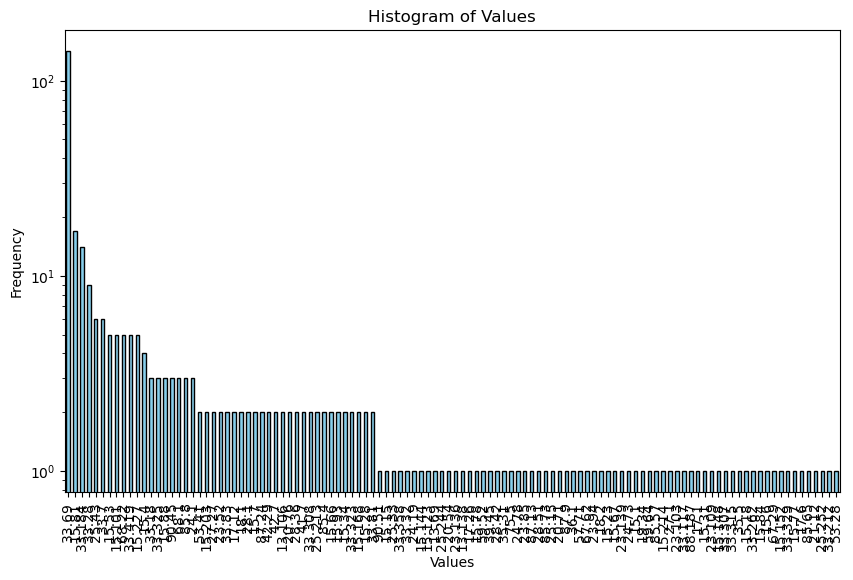

In [9]:
book_counts = pd.to_numeric(df["ln5"], errors="coerce").fillna(0).value_counts()

# Remove entries where frequency is 0 (just in case)
book_counts = book_counts[book_counts.index != 0]

# Plot the histogram (bar chart)
book_counts.plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yscale('log')

# Show the plot
plt.show()

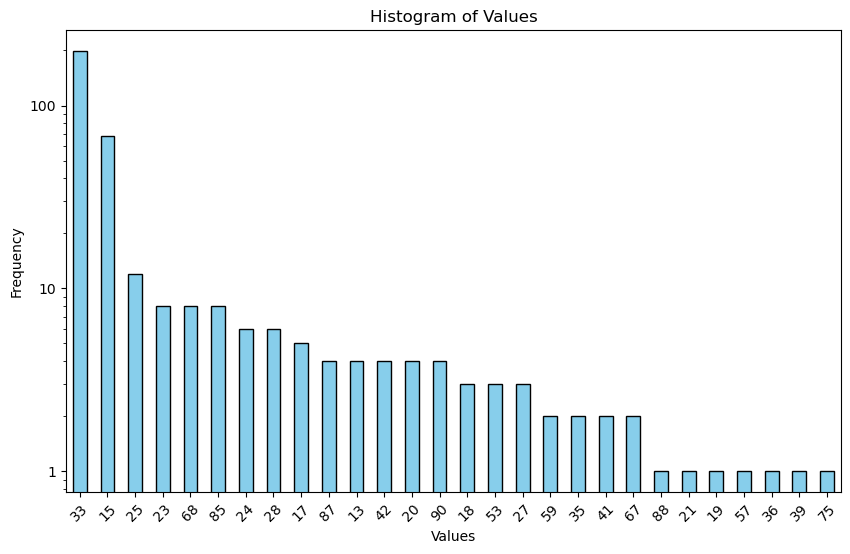

In [16]:
# Convert to numeric and count occurrences
book_counts = pd.to_numeric(df["ln5"], errors="coerce").fillna(0).astype(int).value_counts()

# Remove entries where frequency is 0
book_counts = book_counts.drop(0, errors="ignore")

# Plot the histogram (bar chart)
fig, ax = plt.subplots(figsize=(10, 6))
book_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)

# Labels and title
ax.set_xlabel("Values")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Values")
ax.set_xticklabels(book_counts.index, rotation=45)  # Rotate x-axis labels

# Use log scale for better visualization
ax.set_yscale('log')

# Correctly apply ScalarFormatter to the axes
ax.yaxis.set_major_formatter(ScalarFormatter())

# Show the plot
plt.show()

33 - Communication\
33.69 - speak, talk - λέγω\
33.184 - question, answer - ἀποκρίνομαι\
33.28 - language levels - ἀποκρίνομαι\
15 - Linear Movement\
15.81 - come, come to, arrive - ἔρχομαι\
25 - Attitudes and Emotions\
25.43 - love, affection, compassion - ἀγαπάω\
\
"0" if missing the Lown-Nida classification\
https://www.laparola.net/greco/louwnida.php?sezmag=25&sez1=43&sez2=43

# Theology of verb κατηγορέω

In [104]:
results = N1904.search("""
p1:word lemma*
p2:word lemma=κατηγορέω voice=active

p1 <frame=A0- p2
""")
N1904.table(results, condenseType='clause')

  0.31s 28 results


In [105]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='theology_subject.tsv')

In [106]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [107]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/theology_subject.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemma1,NODE2,TYPE2,TEXT2,lemma2,voice2
0,1,Matthew,12,2,6104,word,Φαρισαῖοι,Φαρισαῖος,6239,word,κατηγορήσωσιν,κατηγορέω,active
1,2,Mark,2,24,19456,word,Φαρισαῖοι,Φαρισαῖος,19564,word,κατηγορήσωσιν,κατηγορέω,active


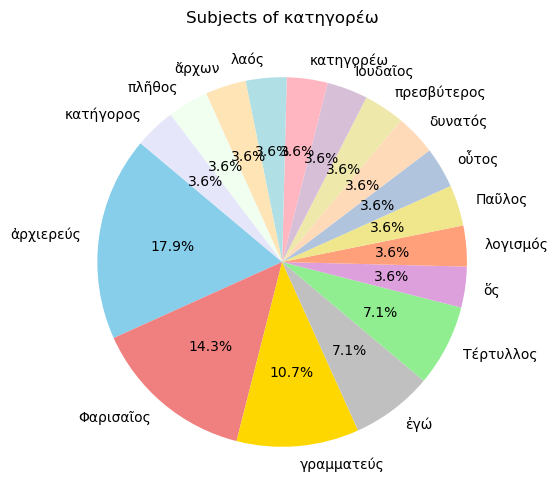

In [108]:
df = pd.DataFrame(NTresults['lemma1']) # Creating Pandas DataFrame

voice_verb = df["lemma1"].value_counts() # Counting subject lemmas

colors = ["skyblue", "lightcoral", "gold", "silver",
"lightgreen", "plum", "lightsalmon", "khaki",
"lightsteelblue", "peachpuff", "palegoldenrod",
"thistle", "lightpink", "powderblue", "moccasin",
"honeydew", "lavender"]

plt.figure(figsize=(6, 6))
plt.pie(voice_verb, labels=voice_verb.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title("Subjects of κατηγορέω")
plt.show() # Plot pie chart

In [109]:
results = N1904.search("""
p1:word lemma*
p2:word lemma=κατηγορέω voice=active

p1 <frame=A1|A2- p2
""")
N1904.table(results, condenseType='clause')

  0.27s 23 results


In [110]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='theology_object.tsv')

In [111]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/theology_object.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemma1,NODE2,TYPE2,TEXT2,lemma2,voice2
0,1,Matthew,12,10,6240,word,αὐτοῦ.,αὐτός,6239,word,κατηγορήσωσιν,κατηγορέω,active
1,2,Mark,3,2,19565,word,αὐτοῦ.,αὐτός,19564,word,κατηγορήσωσιν,κατηγορέω,active


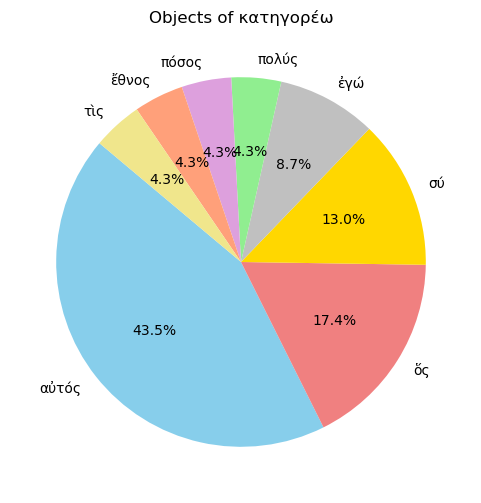

In [112]:
df = pd.DataFrame(NTresults['lemma1']) # Creating Pandas DataFrame

voice_verb = df["lemma1"].value_counts() # Counting subject lemmas

colors = ["skyblue", "lightcoral", "gold", "silver",
"lightgreen", "plum", "lightsalmon", "khaki",
"lightsteelblue", "peachpuff", "palegoldenrod",
"thistle", "lightpink", "powderblue", "moccasin",
"honeydew", "lavender"]

plt.figure(figsize=(6, 6))
plt.pie(voice_verb, labels=voice_verb.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Objects of κατηγορέω")
plt.show() # Plot pie chart

# Jesus overcame, but the rightheous ones are overcaming

In [34]:
results = N1904.search("""
book book=Revelation
    pred:word lemma=νικάω tense=aorist
    subj:word

subj <frame=A0- pred
""")
N1904.table(results, condenseType='sentence', colorMap={2: 'pink', 4: 'cyan'})

  0.32s 5 results


In [39]:
results = N1904.search("""
book book=Revelation
    pred:word lemma=νικάω tense=present
    subj:word

subj <frame=A0- pred
""")
N1904.table(results, condenseType='sentence', colorMap={2: 'pink'})

  0.32s 10 results


In [36]:
results = N1904.search("""
book book=Revelation
    pred:word lemma=νικάω tense#present|aorist
    subj:word
    objc:word

subj <frame=A0- pred
objc <frame=A1- pred
""")
N1904.table(results, condenseType='sentence', colorMap={2: 'pink', 4: 'cyan'})

  0.49s 2 results


n,p,sentence,word,word,word
1,Revelation 11:7,"καὶ ὅταν τελέσωσιν τὴν μαρτυρίαν αὐτῶν, τὸ θηρίον τὸ ἀναβαῖνον ἐκ τῆς ἀβύσσου ποιήσει μετ’ αὐτῶν πόλεμον καὶ νικήσει αὐτοὺς καὶ ἀποκτενεῖ αὐτούς.",θηρίον,νικήσει,αὐτοὺς
2,Revelation 17:14,"οὗτοι μετὰ τοῦ Ἀρνίου πολεμήσουσιν καὶ τὸ Ἀρνίον νικήσει αὐτούς, ὅτι Κύριος κυρίων ἐστὶν καὶ Βασιλεὺς βασιλέων, καὶ οἱ μετ’ αὐτοῦ κλητοὶ καὶ ἐκλεκτοὶ καὶ πιστοί.",Ἀρνίον,νικήσει,"αὐτούς,"


In [142]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='revelation.tsv')

In [143]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/revelation.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(30)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,...,number3,person3,tense3,NODE4,TYPE4,TEXT4,lemma4,mood4,number4,tense4
0,1,Revelation,2,7,137806,book,Revelation,266097,sentence,Τῷ νικῶντι δώσω αὐτῷ φαγεῖν ἐκ τοῦ ξύλου τῆς ζ...,...,singular,NaN,present,128548,word,νικῶντι,νικάω,participle,singular,present
1,2,Revelation,2,11,137806,book,Revelation,266105,sentence,Ὁ νικῶν οὐ μὴ ἀδικηθῇ ἐκ τοῦ θανάτου τοῦ δευτέ...,...,singular,NaN,present,128653,word,νικῶν,νικάω,participle,singular,present
2,3,Revelation,2,17,137806,book,Revelation,266114,sentence,Τῷ νικῶντι δώσω αὐτῷ τοῦ μάννα τοῦ κεκρυμμένου...,...,singular,NaN,present,128783,word,νικῶντι,νικάω,participle,singular,present
3,4,Revelation,2,26,137806,book,Revelation,266125,sentence,Καὶ ὁ νικῶν καὶ ὁ τηρῶν ἄχρι τέλους τὰ ἔργα μο...,...,singular,NaN,present,128988,word,νικῶν,νικάω,participle,singular,present
4,5,Revelation,3,5,137806,book,Revelation,266134,sentence,Ὁ νικῶν οὕτως περιβαλεῖται ἐν ἱματίοις λευκοῖς...,...,singular,NaN,present,129139,word,νικῶν,νικάω,participle,singular,present
5,6,Revelation,3,12,137806,book,Revelation,266144,sentence,"Ὁ νικῶν, ποιήσω αὐτὸν στῦλον ἐν τῷ ναῷ τοῦ Θεο...",...,singular,NaN,present,129314,word,"νικῶν,",νικάω,participle,singular,present
6,7,Revelation,3,21,137806,book,Revelation,266156,sentence,Ὁ νικῶν δώσω αὐτῷ καθίσαι μετ’ ἐμοῦ ἐν τῷ θρόν...,...,singular,NaN,present,129529,word,νικῶν,νικάω,participle,singular,present
7,8,Revelation,3,21,137806,book,Revelation,266156,sentence,Ὁ νικῶν δώσω αὐτῷ καθίσαι μετ’ ἐμοῦ ἐν τῷ θρόν...,...,singular,p1,aorist,129540,word,κἀγὼ,κἀγώ,NaN,singular,NaN
8,9,Revelation,5,5,137806,book,Revelation,266174,sentence,"ἰδοὺ ἐνίκησεν ὁ Λέων ὁ ἐκ τῆς φυλῆς Ἰούδα, ἡ Ῥ...",...,singular,p3,aorist,129936,word,Λέων,λέων,NaN,singular,NaN
9,10,Revelation,6,2,137806,book,Revelation,266184,sentence,"καὶ εἶδον, καὶ ἰδοὺ ἵππος λευκός, καὶ ὁ καθήμε...",...,singular,NaN,present,130225,word,καθήμενος,κάθημαι,participle,singular,present


In [6]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [144]:
columns_to_extract = ['S1', 'S2', 'S3', 'mood3', 'number3', 'person3', 'tense3', 'mood4', 'number4', 'tense4']
# Extract the desired columns
df_extracted = NTresults[columns_to_extract].drop_duplicates().reset_index(drop=True)
df_extracted

,S1,S2,S3,mood3,number3,person3,tense3,mood4,number4,tense4
0,Revelation,2,7,participle,singular,NaN,present,participle,singular,present
1,Revelation,2,11,participle,singular,NaN,present,participle,singular,present
2,Revelation,2,17,participle,singular,NaN,present,participle,singular,present
3,Revelation,2,26,participle,singular,NaN,present,participle,singular,present
4,Revelation,3,5,participle,singular,NaN,present,participle,singular,present
5,Revelation,3,12,participle,singular,NaN,present,participle,singular,present
6,Revelation,3,21,participle,singular,NaN,present,participle,singular,present
7,Revelation,3,21,indicative,singular,p1,aorist,NaN,singular,NaN
8,Revelation,5,5,indicative,singular,p3,aorist,NaN,singular,NaN
9,Revelation,6,2,participle,singular,NaN,present,participle,singular,present


In [41]:
results = N1904.search("""
book book=Revelation
    w1:word lemma=νικάω
""")
N1904.table(results, condensed=False, queryFeatures=False, extraFeatures={'trans', 'framespec', 'id', 'tense', 'lemma', 'mood', 'number'}, hiddenTypes={'subphrase', 'wg'})

  0.14s 17 results


n,p,book,word
1,Revelation 2:7,Revelation,νικῶντι
2,Revelation 2:11,Revelation,νικῶν
3,Revelation 2:17,Revelation,νικῶντι
4,Revelation 2:26,Revelation,νικῶν
5,Revelation 3:5,Revelation,νικῶν
6,Revelation 3:12,Revelation,"νικῶν,"
7,Revelation 3:21,Revelation,νικῶν
8,Revelation 3:21,Revelation,ἐνίκησα
9,Revelation 5:5,Revelation,ἐνίκησεν
10,Revelation 6:2,Revelation,νικῶν


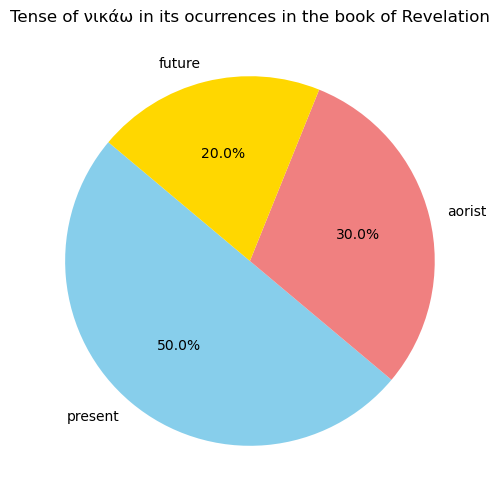

In [154]:
df = pd.DataFrame(NTresults['tense3']) # Creating Pandas DataFrame

book_counts = df["tense3"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold"])
plt.title("Tense of νικάω in its ocurrences in the book of Revelation")
plt.show() # Plot pie chart

In [126]:
results = N1904.search("""
w1:word lemma=ἀμήν
""")
N1904.show(results, end=10, condensed=False, queryFeatures=False, extraFeatures={'trans', 'framespec', 'id', 'tense', 'lemma', 'mood', 'number'}, hiddenTypes={'subphrase', 'wg'})

  0.14s 126 results
